# Time series

In [1]:
import ga_utils as g
import pandas as pd
import auth as auth
import matplotlib
import config as config
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# launch auth process
auth.main()

In [3]:
df = g.get_all_pageviews("94275425", start_date='2015-05-01', end_date='2016-05-20')
df.head()

,ga:date,ga:pageviews
0,20150501,6016
1,20150502,5567
2,20150503,5737
3,20150504,4676
4,20150505,6296


# Rolling average

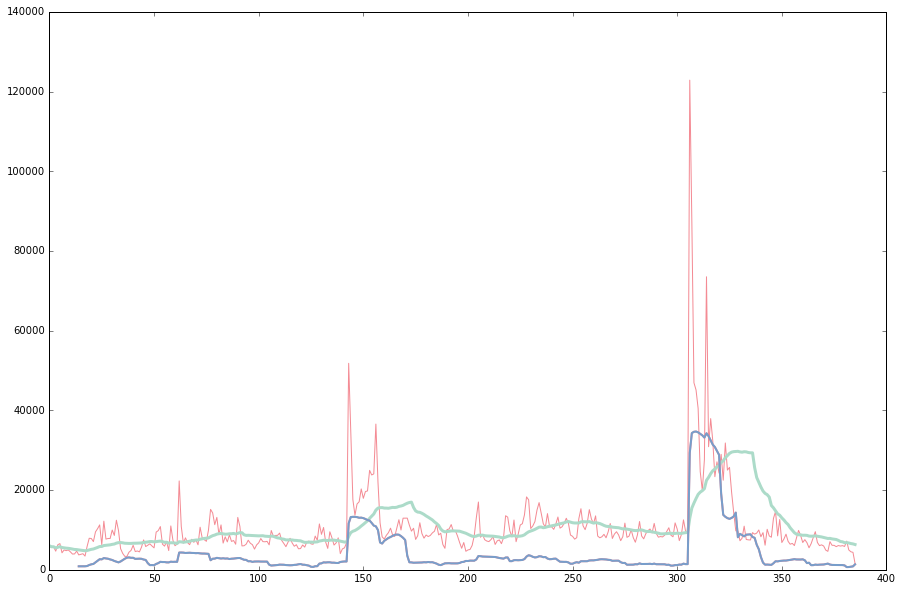

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

df.set_index('ga:date')
n_days = 30
dd = pd.to_numeric(df['ga:pageviews']).as_matrix()

m = np.array([np.mean(dd[max(0, i - n_days) : i+1]) for i in range(len(dd))])

plt.plot(dd, g.colours['red'])
plt.plot(m, g.colours['blue'], linewidth=3)
plt.plot(pd.Series(df['ga:pageviews']).rolling(window=15).std(), g.colours['red'], linewidth=2)
plt.plot(pd.Series(df['ga:pageviews']).rolling(window=15).std(), g.colours['dark-blue'], linewidth=2)